In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [17]:
df = pd.read_csv("weather.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

   MinTemp  MaxTemp  Rainfall  ...  RainToday  RISK_MM RainTomorrow
0      8.0     24.3       0.0  ...         No      3.6          Yes
1     14.0     26.9       3.6  ...        Yes      3.6          Yes
2     13.7     23.4       3.6  ...        Yes     39.8          Yes
3     13.3     15.5      39.8  ...        Yes      2.8          Yes
4      7.6     16.1       2.8  ...        Yes      0.0           No

[5 rows x 22 columns]


In [18]:
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")

In [19]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [20]:
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

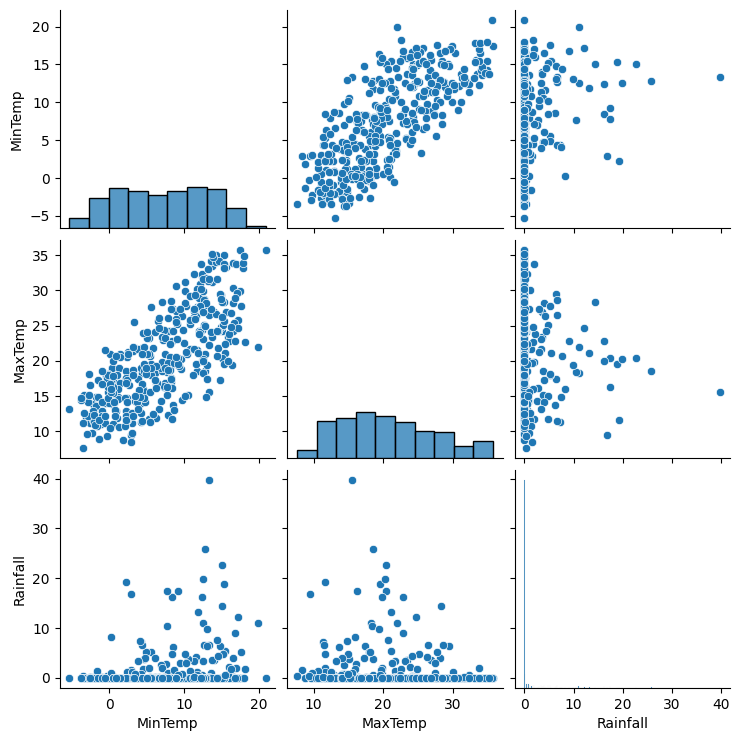

In [24]:
numeric_feature = ['MinTemp', 'MaxTemp', 'Rainfall']
sns.pairplot(df[numeric_feature])
plt.show()

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [27]:
print(f"MAE  (Mean Absolute Error): {mae}")
print(f"MSE  (Mean Squared Error): {mse}")
print(f"RMSE (Root MSE): {rmse}")
print(f"R² Score (Accuracy): {r2}")

MAE  (Mean Absolute Error): 0.188740850851035
MSE  (Mean Squared Error): 0.08323838597603579
RMSE (Root MSE): 0.2885106340779067
R² Score (Accuracy): 0.5088217655120992
